In [1]:
import pandas as pd
df = pd.read_csv("ready_to_model.csv")
df.head()

,MMSI,track_num,cumulative_distance,cumulative_heading,SOG_mean,SOG_median,SOG_std,Status,Length,Width,Draft,SuperClass,norm_heading
0,527918,0,2.662621,0.0,1.189537,0.0,2.739407,-1,20.0,7.0,0.0,3,0.0
1,527918,1,2.229054,0.0,8.055952,9.8,3.638651,-1,20.0,7.0,0.0,3,0.0
2,527918,2,0.018335,0.0,0.279167,0.0,0.680412,-1,20.0,7.0,0.0,3,0.0
3,527918,3,0.028191,0.0,0.388136,0.0,1.179141,-1,20.0,7.0,0.0,3,0.0
4,527918,4,0.036418,0.0,0.020307,0.0,0.282021,-1,20.0,7.0,0.0,3,0.0


scale the data
split test/train
random forest

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [19]:
#X = df[["cumulative_distance","cumulative_heading","SOG_mean",
#        "SOG_median","SOG_std","Status","Length","Width","Draft","norm_heading"]]

X = df[["cumulative_distance","SOG_mean",
        "SOG_std","Status","Length","Width","Draft","norm_heading"]]

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [20]:
y = df[["SuperClass"]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, stratify=y)

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)

C:\Users\gator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9978780070588745

In [29]:
model.score(X_test, y_test)

0.9648138925578676

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021536730988>]],
      dtype=object)

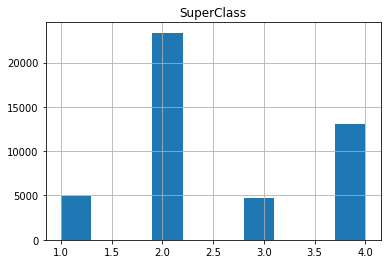

In [30]:
y_train.hist(column='SuperClass')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002153581BB48>]],
      dtype=object)

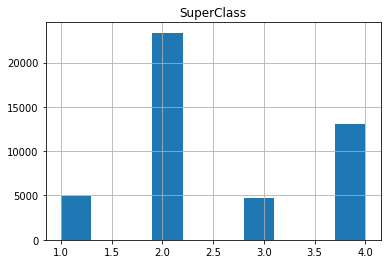

In [31]:
y_test.hist(column='SuperClass')